In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_excel('sales_data_sample.xlsx', sheet_name='saledata')

df.head(5)

,ORDERNUMBER,QUANTITYORDERED,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,COUNTRY,DEALSIZE,Discount,Profit
0,10107,30,2,2871.00,2003-02-24,Shipped,USA,Small,0.00,41.9136
1,10121,34,5,2765.90,2003-05-07,Shipped,France,Small,0.00,219.5820
2,10134,41,2,3884.34,2003-07-01,Shipped,France,Medium,0.00,6.8714
3,10145,45,6,3746.70,2003-08-25,Shipped,USA,Medium,0.45,-383.0310
4,10159,49,14,5205.27,2003-10-10,Shipped,USA,Medium,0.20,2.5164


In [60]:
# Câu 2
size_counts = df['DEALSIZE'].value_counts()

size_counts

DEALSIZE
Medium    1384
Small     1282
Large      157
Name: count, dtype: int64

In [66]:
test = df['DEALSIZE'].sum()
test

'SmallSmallMediumMediumMediumMediumSmallMediumSmallMediumMediumSmallMediumMediumMediumMediumSmallMediumMediumMediumLargeSmallSmallMediumSmallLargeMediumLargeLargeLargeLargeMediumLargeMediumLargeLargeMediumMediumMediumLargeMediumLargeLargeLargeLargeMediumMediumMediumMediumMediumLargeSmallMediumLargeMediumSmallMediumMediumMediumMediumMediumMediumMediumMediumMediumSmallMediumMediumSmallMediumMediumMediumMediumMediumSmallSmallMediumSmallMediumMediumMediumLargeLargeMediumMediumMediumLargeLargeLargeMediumLargeLargeLargeLargeMediumMediumMediumMediumLargeMediumSmallMediumMediumSmallLargeLargeLargeMediumMediumMediumMediumMediumMediumMediumMediumMediumMediumSmallMediumMediumSmallMediumSmallMediumMediumSmallSmallSmallMediumMediumMediumLargeSmallMediumMediumMediumMediumMediumMediumMediumMediumMediumMediumLargeMediumMediumMediumMediumLargeMediumMediumMediumSmallMediumMediumMediumSmallMediumSmallMediumMediumMediumLargeLargeLargeLargeMediumMediumMediumMediumLargeMediumMediumMediumLargeLargeMediumMedi

In [67]:

size_per = (size_counts / 2823) * 100

size_per

DEALSIZE
Medium    49.025859
Small     45.412682
Large      5.561459
Name: count, dtype: float64

In [18]:
# Câu 3
df.shape

(2823, 10)

In [19]:
import scipy.stats as stats
from statsmodels.stats.weightstats import ztest as ztest
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats.stats import pearsonr
from scipy.stats import chi2_contingency
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn import preprocessing
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

C:\Users\T14\AppData\Local\Temp\ipykernel_25800\2042521834.py:5: DeprecationWarning: Please import `pearsonr` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.stats.stats import pearsonr


In [20]:
# Câu 5
y = OneHotEncoder().fit_transform(df[['DEALSIZE']]).toarray()
print(y)

[[0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 ...
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]


In [23]:
# Câu 6
model = ols('QUANTITYORDERED ~ STATUS + DEALSIZE + QUANTITYORDERED:DEALSIZE', data=df).fit()
aov_table = sm.stats.anova_lm(model, typ=1)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
STATUS,5.0,3.562031e+03,7.124063e+02,5.744658e+28,0.0
DEALSIZE,2.0,5.959676e+04,2.979838e+04,2.402863e+30,0.0
QUANTITYORDERED:DEALSIZE,3.0,2.046369e+05,6.821230e+04,5.500461e+30,0.0
Residual,2812.0,3.487216e-23,1.240120e-26,NaN,NaN


In [24]:
import  numpy as np

In [28]:
# Câu 8
df["newSales"] =  1 / ((np.log(df["SALES"]) ** 2) + 1)
df["newSales_final"] = np.sqrt(df["newSales"])

df["newSales_final"].skew()

np.float64(0.5662633890152213)

In [29]:
# Câu 9
model = ols('SALES ~ STATUS', data=df).fit()
aov_table = sm.stats.anova_lm(model, typ=1)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
STATUS,5.0,5.921801e+07,1.184360e+07,3.506652,0.003661
Residual,2817.0,9.514324e+09,3.377467e+06,NaN,NaN


h0: có mối liên hệ
0.003 < 0.05 -> accept: có mối liên hệ


In [30]:
# Câu 12
df['SALES'].skew()

np.float64(1.161076000881289)

In [31]:
# Câu 15
scaler = StandardScaler()
scaled = scaler.fit_transform(df[['SALES']])
scaled_df = pd.DataFrame(scaled, columns=df[['SALES']].columns)

scaler.inverse_transform([[0.25]])

array([[4014.27378493]])

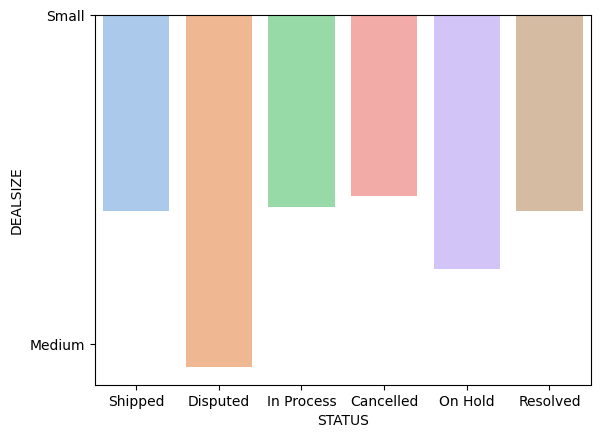

In [32]:
# câu 16
sns.barplot(x='STATUS', y='DEALSIZE', hue="STATUS", data=df, errorbar=None, palette='pastel')
plt.show()

# Đánh dấu

In [43]:
count_id = df['ORDERNUMBER'].value_counts()

final_count = count_id.head(20)

final_count

ORDERNUMBER
10386    18
10398    18
10106    18
10222    18
10316    18
10275    18
10159    18
10168    18
10165    18
10332    18
10122    17
10310    17
10287    17
10312    17
10373    17
10182    17
10181    17
10135    17
10204    17
10126    17
Name: count, dtype: int64

In [44]:
# Câu 18
df["newSales"] =  np.log(df["SALES"])

df[["SALES", "newSales"]].skew()

SALES       1.161076
newSales   -0.202174
dtype: float64

lệch ngược chiều so với ban đầu, lệch ít hơn ban đầu

In [54]:
# Câu 19
count_country = df.groupby('COUNTRY')['Profit'].sum()

top_5_countries = count_country.sort_values(ascending=False).head(15)

top_5_countries

COUNTRY
USA            21341.9950
Spain          11779.8851
Australia       8113.6187
Canada          5822.9162
UK              4594.8300
Italy           4409.6194
Norway          3015.3555
France          2940.2749
Denmark         2008.7175
Singapore       1887.8876
Germany         1677.1145
Belgium         1143.8593
Sweden           973.4532
Switzerland      716.5745
Austria          655.5536
Name: Profit, dtype: float64

In [56]:
# Câu 20
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df[['SALES']])
scaled_df = pd.DataFrame(scaled, columns=df[['SALES']].columns).iloc[50:60]
scaled_df

,SALES
50,0.571492
51,0.142230
52,0.268965
53,0.846934
54,0.251044
55,0.169972
56,0.207757
57,0.346367
58,0.333417
59,0.233724
